# Plot Butler's importance in his Minnesota Timberwolves year

## Imports 

In [1]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg

from PIL import Image

import datetime
from highlight_text import fig_text

## Retrieve data for Minnesota


In [2]:
df = pd.read_csv("../data/teams_total/minnesota_2017-2018.csv")

In [3]:
df.head()

,Rk,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Andrew Wiggins,22,82,82,2979,569,1300,0.438,112,...,0.643,82,276,358,160,91,51,138,163,1452
1,2,Karl-Anthony Towns,22,82,82,2918,639,1172,0.545,120,...,0.858,238,774,1012,199,64,115,159,285,1743
2,3,Taj Gibson,32,82,82,2726,425,737,0.577,7,...,0.768,194,390,584,99,62,59,89,218,999
3,4,Jeff Teague,29,70,70,2311,354,794,0.446,84,...,0.845,24,185,209,492,102,23,177,171,994
4,5,Jimmy Butler,28,59,59,2164,437,921,0.474,70,...,0.854,79,235,314,288,116,24,108,78,1307


In [4]:
#df.loc[df['Player'].str.split().str.len() == 2, 'Player'] = df['Player'].str.split().str[-1]
df['Player']= df['Player'].str.split().str[-1]


In [5]:
df = df[['Player','FG', 'MP', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'PTS']]

In [6]:
df.head()

,Player,FG,MP,FT,FTA,TRB,AST,STL,BLK,PTS
0,Wiggins,569,2979,202,314,358,160,91,51,1452
1,Towns,639,2918,345,402,1012,199,64,115,1743
2,Gibson,425,2726,142,185,584,99,62,59,999
3,Teague,354,2311,202,239,209,492,102,23,994
4,Butler,437,2164,363,425,314,288,116,24,1307


## Plot different stats and Jimmy's rank in the team

In [7]:
points = df.sort_values(by=['PTS'], ascending=False).head(5)
assists = df.sort_values(by=['AST'], ascending=False).head(5)
rebounds = df.sort_values(by=['TRB'], ascending=False).head(5)
minutes = df.sort_values(by=['MP'], ascending=False).head(5)
freethrows = df.sort_values(by=['FT'], ascending=False).head(5)

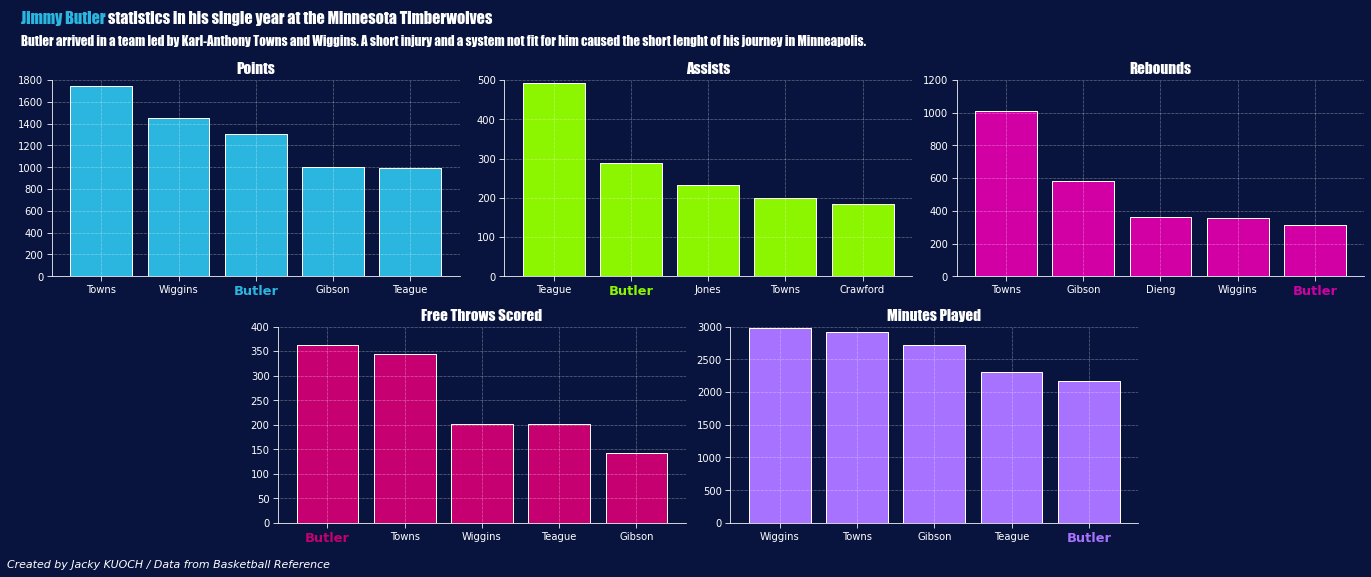

In [8]:
# Create subplots
fig,axs = plt.subplots(2,3,figsize = (19,7))
hfont = {'fontname':'Impact'}

#Position of the plots
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

#Add grid to the plots
ax1.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax2.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax3.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax4.grid(ls="dotted", lw="0.5", color="w", zorder=1)
ax5.grid(ls="dotted", lw="0.5", color="w", zorder=1)

#Change the background color
fig.set_facecolor("#08143D")
ax1.patch.set_facecolor("#08143D")
ax2.patch.set_facecolor("#08143D")
ax3.patch.set_facecolor("#08143D")
ax4.patch.set_facecolor("#08143D")
ax5.patch.set_facecolor("#08143D")

#Change the ticks color
ax1.tick_params(colors="w", length=5)
ax2.tick_params(colors="w", length=5)
ax3.tick_params(colors="w", length=5)
ax4.tick_params(colors="w", length=5)
ax5.tick_params(colors="w", length=5)

#Change the axes color
## First plot
ax1.spines['bottom'].set_color("w")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color("w")

## Second plot
ax2.spines['bottom'].set_color("w")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("w")

## Third plot
ax3.spines['bottom'].set_color("w")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_color("w")

## Fourth plot
ax4.spines['bottom'].set_color("w")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_color("w")

## Fith plot
ax5.spines['bottom'].set_color("w")
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_color("w")

## Set ylimits
ax1.set_ylim(0,1800)
ax2.set_ylim(0,500)
ax3.set_ylim(0,1200)
ax4.set_ylim(0,400)
ax5.set_ylim(0,3000)

# Title and credits
fig_text(0.01,1.08, s="<Jimmy Butler> statistics in his single year at the Minnesota Timberwolves\n", highlight_textprops=[{"color": '#2bb6e0'}], fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.01,1.01, "Butler arrived in a team led by Karl-Anthony Towns and Wiggins. A short injury and a system not fit for him caused the short lenght of his journey in Minneapolis.", fontsize = 13, fontweight="light", color = "w", **hfont)
fig.text(0, -0.025, "Created by Jacky KUOCH / Data from Basketball Reference",fontstyle="italic",fontsize=11, color="w")

# Plot bar charts of stats
ax1.bar(points['Player'], points['PTS'], zorder=0, color="#2bb6e0",edgecolor = 'w')
ax2.bar(assists['Player'], assists['AST'], zorder=0, color="#8BF600",edgecolor = 'w')
ax3.bar(rebounds['Player'], rebounds['TRB'], zorder=0, color="#D200A4",edgecolor = 'w')
ax4.bar(freethrows['Player'], freethrows['FT'],zorder=0, color="#C60070",edgecolor = 'w')
ax5.bar(minutes['Player'], minutes['MP'],zorder=0, color="#A672FF",edgecolor = 'w')

# Axes Label
## First plot
ax1.set_title("Points", color="w", fontsize=15 , **hfont)
ax2.set_title("Assists", color="w", fontsize=15 , **hfont)
ax3.set_title("Rebounds", color="w", fontsize=15 , **hfont)
ax4.set_title("Free Throws Scored", color="w", fontsize=15 , **hfont)
ax5.set_title("Minutes Played", color="w", fontsize=15 , **hfont)

#Highlight Jimmy's xticks for first plot
ax1.get_xticklabels()[2].set_color("#2bb6e0")
ax1.get_xticklabels()[2].set_fontsize(13)
ax1.get_xticklabels()[2].set_weight("heavy")

#Highlight Jimmy's xticks for second plot
ax2.get_xticklabels()[1].set_color("#8BF600")
ax2.get_xticklabels()[1].set_fontsize(13)
ax2.get_xticklabels()[1].set_weight("heavy")

#Highlight Jimmy's xticks for third plot
ax3.get_xticklabels()[4].set_color("#D200A4")
ax3.get_xticklabels()[4].set_fontsize(13)
ax3.get_xticklabels()[4].set_weight("heavy")

#Highlight Jimmy's xticks for fourth plot
ax4.get_xticklabels()[0].set_color("#C60070")
ax4.get_xticklabels()[0].set_fontsize(13)
ax4.get_xticklabels()[0].set_weight("heavy")

#Highlight Jimmy's xticks for fith plot
ax5.get_xticklabels()[4].set_color("#A672FF")
ax5.get_xticklabels()[4].set_fontsize(13)
ax5.get_xticklabels()[4].set_weight("heavy")

fig.tight_layout()